In [1]:
from cnn_builder import *
from config import *
from dataset_functions import *
from hypercube_set import HypercubeSet
from hypercube_loader import *
import numpy as np
import tensorflow as tf
import tensorflow.keras as tk

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

inf = 2e32

%load_ext autoreload
%autoreload 2

In [2]:
hc_set = HypercubeSet(hc_array=load_hypercubes(plot_hc=False, plot_mask=False, n_max_cubes=inf, additional_root='../'))
hc_set.print_metadata()

Reading ../media/Mateus_2022/Area01\raw_112_rf.hdr ...
Reading ../media/Mateus_2022/Area01\raw_1984_rf.hdr ...
Reading ../media/Mateus_2022/Area01\raw_3904_rf.hdr ...
Reading ../media/Mateus_2022/Area01\raw_5744_rf.hdr ...
Reading ../media/Mateus_2022/Area01\raw_7584_rf.hdr ...
Min: 0.006377667188644409, Max: 0.16416394710540771, Size: (1840, 3200, 223)


In [56]:
hc_set.obtain_ground_labels()
hc_set.obtain_train_indices(test_percentage=test_split)

In [57]:
hc_set.standardize()

In [58]:
X_train, y_train = hc_set.split_train(patch_size=patch_size)
y_train = reduce_labels_center(y_train)

|████████████████████████████████████████| 313709/313709 [100%] in 1.1s (278419.09/s)                                   


In [59]:
X_test, y_test = hc_set.split_test(patch_size=patch_size)
y_test = reduce_labels_center(y_test)

|████████████████████████████████████████| 78428/78428 [100%] in 0.3s (274005.48/s)                                     


In [60]:
print(y_train.shape)
print(y_test.shape)

(307946,)
(76992,)


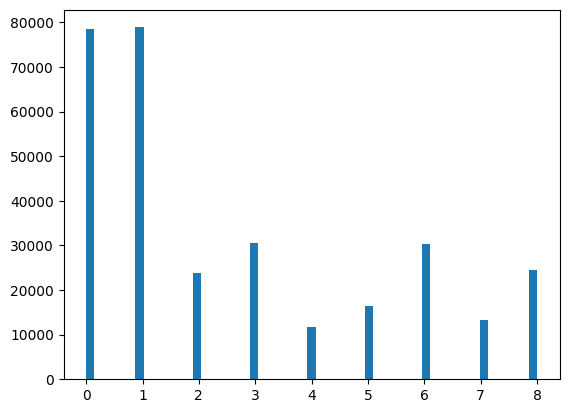

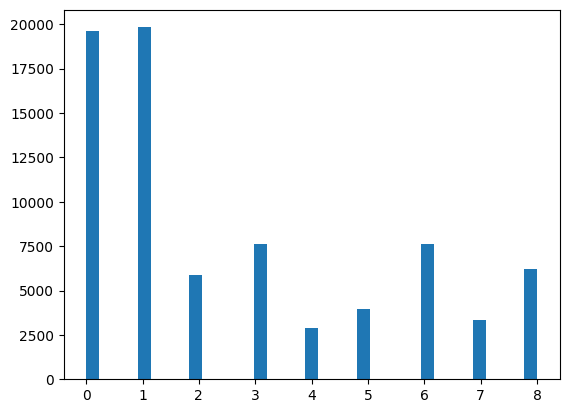

In [61]:
render_mask_histogram(y_train)
render_mask_histogram(y_test)

In [62]:
(patch, patch_label), rest_patch, rest_label = balance_classes(X_train, y_train, reduce=True, clustering=False)

In [65]:
X_train, y_train = [], []
X_train.append(patch)
X_train.append(rest_patch)
y_train.append(patch_label)
y_train.append(rest_label)
vegetation_indices = np.where(y_train[1] == 0)
X_train[1] = np.delete(X_train[1], vegetation_indices)
y_train[1] = np.delete(y_train[1], vegetation_indices)

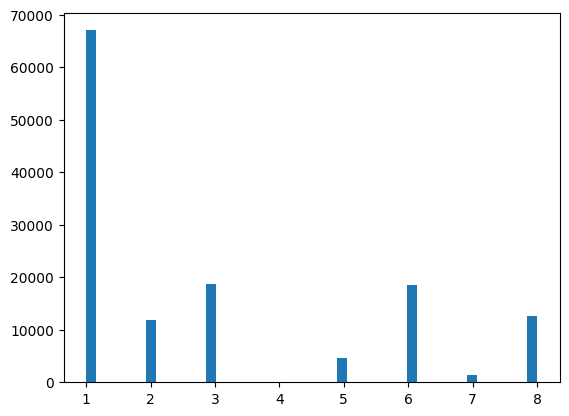

In [66]:
render_mask_histogram(y_train[1])

In [68]:
network_type = 'allopezr_2d'
network_name = get_name(network_type)
num_classes = hc_set.get_num_classes()

model = build_network(network_type=network_type, num_classes=num_classes, image_dim=X_train[0].shape)
compile_network(model, network_type, network_name, num_classes, show_summary=True, render_image=True)
history = run_model(model, X_train[0], y_train[0], validation_split=validation_split, callbacks=get_callback_list(model_name=network_name))

ValueError: A `Concatenate` layer requires inputs with matching shapes except for the concatenation axis. Received: input_shape=[(None, 106281, 10, 10, 30), (None, 106281, 10, 1)]